<h3>This is the solution for building a classifier for filtering spam on Youtube</h3>

<h4>First, we convert the data format to csv and load data using pandas.</h4>

In [1]:

import pandas as pd 
import numpy as np
df = pd.DataFrame(pd.read_excel("yt_test.xlsx")) 
df.to_csv("yt_test.csv")

In [2]:
yt_test=pd.read_csv("yt_test.csv")
yt_train=pd.read_csv("yt_train.csv")


<h4>Check the training data and test data</h4>

In [3]:
yt_train.head()

,VIDEO,AUTHOR,DATE,TEXT,CLASS
0,pRpeEdMmmQ0,Latin Bosch,2013-07-12T22:33:27.916000,Shakira is the best dancer,0
1,pRpeEdMmmQ0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0
2,pRpeEdMmmQ0,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
3,pRpeEdMmmQ0,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
4,pRpeEdMmmQ0,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0


In [4]:
yt_test.head()

,Unnamed: 0,VIDEO,AUTHOR,DATE,TEXT,CLASS
0,0,9bZkp7q19f0,Adele Lupei,2014-11-07T19:47:06,"Is this the video that started the whole ""got ...",0
1,1,9bZkp7q19f0,Daniel Istrati,2014-11-07T19:47:16,Can anyone sub to my channel? :Dï»¿,1
2,2,9bZkp7q19f0,Stronzo Chicheritr,2014-11-07T20:01:15,prehistoric song..has beenï»¿,0
3,3,9bZkp7q19f0,none dies virgin life fucks us all,2014-11-07T20:05:35,You think you're smart? Headbutt your f...,0
4,4,9bZkp7q19f0,JakeFrostMiner Palanca,2014-11-07T20:12:11,DISLIKE.. Now one knows REAL music - ex. Enime...,0


<h4>Check the author that are common in both training and testing</h4>

In [5]:
li1=yt_train["AUTHOR"].values
li2=yt_test["AUTHOR"].values
len1=len(li1)
len2=len(li2)
for i in range(len1):
    for j in range(len2):
        if li2[j]==li1[i]:
            print(li2[j])

Nathan Waterhouse
Mason Sieverding


Only 2 authors are common in train and test, therefore we would not consider author as important in this problem (just drop it)

<h4>Check table info and null values</h4>

In [6]:
yt_train.info()
yt_test.info()
yt_train.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   VIDEO   798 non-null    object
 1   AUTHOR  798 non-null    object
 2   DATE    798 non-null    object
 3   TEXT    798 non-null    object
 4   CLASS   798 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 31.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  202 non-null    int64 
 1   VIDEO       202 non-null    object
 2   AUTHOR      202 non-null    object
 3   DATE        202 non-null    object
 4   TEXT        202 non-null    object
 5   CLASS       202 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 9.6+ KB


VIDEO     0
AUTHOR    0
DATE      0
TEXT      0
CLASS     0
dtype: int64

In [7]:
yt_test.isnull().sum()

Unnamed: 0    0
VIDEO         0
AUTHOR        0
DATE          0
TEXT          0
CLASS         0
dtype: int64

<h4>Split Training data into X,Y</h4>

In [8]:
yt_train_X=yt_train["TEXT"]
yt_train_Y=yt_train["CLASS"]

In [9]:
yt_train_X.head()

0                           Shakira is the best dancer
1                              Shakira u are so wiredo
2                                                  wow
3    I love this song for two reasons: 1.it is abou...
4    I love this song because we sing it at Camp al...
Name: TEXT, dtype: object

In [10]:
yt_train_Y.head()

0    0
1    0
2    0
3    0
4    0
Name: CLASS, dtype: int64

<h4>Check distribution of Spam in training data</h4>

<Axes: xlabel='CLASS', ylabel='count'>

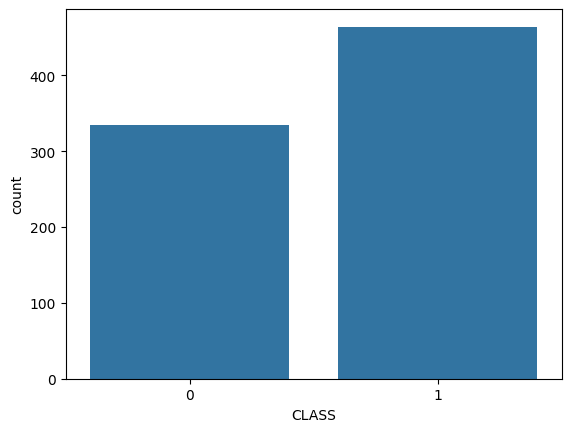

In [11]:
import seaborn as sns
sns.countplot(yt_train,x="CLASS")

<h4>Split the test data into X,Y</h4>

In [12]:
yt_test_X=yt_test["TEXT"]
yt_test_Y=yt_test["CLASS"]

<h3>Option 1a: Build a Linear Regression Model, using CountVectorizer for feature extraction</h3>

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression #use for 2 class classification
from sklearn.metrics import accuracy_score

cv = CountVectorizer()
x_train_feature = cv.fit_transform(yt_train_X)

model = LogisticRegression()
model.fit(x_train_feature,yt_train_Y)

LogisticRegression()

In [14]:
y_pred=model.predict(x_train_feature)
score=accuracy_score(yt_train_Y,y_pred)
print("score using train data is %s\n"%score)

score using train data is 0.9974937343358395



In [15]:
x_test_feature = cv.transform(yt_test_X)
y_pred=model.predict(x_test_feature)
score=accuracy_score(yt_test_Y,y_pred)
print("score using test data is %s\n"%score)

score using test data is 0.9603960396039604



<h3>Option 1b: Build a Linear Regression Model, using TfidVectorizer for feature extraction</h3>

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer # extract text->vector
from sklearn.linear_model import LogisticRegression #use for 2 class classification

tv=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
x_train_feature=tv.fit_transform(yt_train_X)
model = LogisticRegression()
model.fit(x_train_feature,yt_train_Y)

LogisticRegression()

In [17]:
y_pred=model.predict(x_train_feature)
score=accuracy_score(yt_train_Y,y_pred)
print("score using train data is %s\n"%score)

score using train data is 0.9799498746867168



In [18]:
x_test_feature=tv.transform(yt_test_X)
y_pred=model.predict(x_test_feature)
score=accuracy_score(yt_test_Y,y_pred)
print("score using test data is %s\n"%score)

score using test data is 0.9306930693069307



<h3>Option 2 : Train a Recurrent Neural Network (LSTM) for prediction</h3>

In [19]:
yt_train

,VIDEO,AUTHOR,DATE,TEXT,CLASS
0,pRpeEdMmmQ0,Latin Bosch,2013-07-12T22:33:27.916000,Shakira is the best dancer,0
1,pRpeEdMmmQ0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0
2,pRpeEdMmmQ0,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
3,pRpeEdMmmQ0,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
4,pRpeEdMmmQ0,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
...,...,...,...,...,...
793,9bZkp7q19f0,Ben Stalker,2014-11-07T19:27:45,GANGMAN STY- *D-D-D-D-D-D--DROP THE BASS!!*﻿,0
794,9bZkp7q19f0,xxxTheMikeTxxx,2014-11-07T19:33:03,Will this song ever reach 7 Billion Views?﻿,0
795,9bZkp7q19f0,Kemal Kurtoglu,2014-11-07T19:33:46,"Im a RAPPER/SONGWRITER, check my video PLEASE....",1
796,CevxZvSJLk8,Martwy Karas,2014-11-07T19:33:46,Katy Perry's songs are the best of the songs o...,0


In [20]:
yt_train=yt_train[["TEXT","CLASS"]]
yt_test=yt_test[["TEXT","CLASS"]]

In [21]:
yt_train

,TEXT,CLASS
0,Shakira is the best dancer,0
1,Shakira u are so wiredo,0
2,wow,0
3,I love this song for two reasons: 1.it is abou...,0
4,I love this song because we sing it at Camp al...,0
...,...,...
793,GANGMAN STY- *D-D-D-D-D-D--DROP THE BASS!!*﻿,0
794,Will this song ever reach 7 Billion Views?﻿,0
795,"Im a RAPPER/SONGWRITER, check my video PLEASE....",1
796,Katy Perry's songs are the best of the songs o...,0


In [22]:
yt_test

,TEXT,CLASS
0,"Is this the video that started the whole ""got ...",0
1,Can anyone sub to my channel? :Dï»¿,1
2,prehistoric song..has beenï»¿,0
3,You think you're smart? Headbutt your f...,0
4,DISLIKE.. Now one knows REAL music - ex. Enime...,0
...,...,...
197,Check out this video on YouTube:ï»¿,1
198,Check out this video on YouTube:ï»¿,1
199,Check out this video on YouTube:ï»¿,1
200,Check out this video on YouTube:ï»¿,1


In [23]:
import tensorflow as tf
#shuffle + format panda df to tf.data
# reference from https://www.tensorflow.org/tutorials/structured_data/feature_columns
def df_to_dataset(dataframe, shuffle=True, batch_size=30):
  df = dataframe.copy()
  labels = df.pop('CLASS')
  df = df['TEXT']
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

This time we dont use TFidVectorizer or CountVetorizer for producing vector for every text record, we directly prepare an encoder which would feed to the network, every sentence would be encoded into a number vector as it pass through first layer

In [24]:

encoder= tf.keras.layers.TextVectorization()
yt_train_tfdata=df_to_dataset(yt_train)
list(yt_train_tfdata)[0]

(<tf.Tensor: shape=(30,), dtype=string, numpy=
 array([b'https://twitter.com/GBphotographyGB\xef\xbb\xbf',
        b'https://www.tsu.co/Aseris get money here !\xef\xbb\xbf',
        b'Ching Ching ling long ding ring yaaaaaa Ganga sty FUCK YOU.\xef\xbb\xbf',
        b"People, here is a new network like FB...you register also free, the  difference is only that you get paid for sharing, commenting and liking  posts and so one...don't waste your time on fb for sharing and not being  paid!! Register here to make also money with your everyday posts!!  https://www.tsu.co/slema13 Wellcome to everyone! ;)\xef\xbb\xbf",
        b'Subscribe to my channel \xef\xbb\xbf',
        b'Hi everyone! Do you like music? Then why not check out my music channel. The LEXIS band will be uploading their own songs and covers soon so don&#39;t miss out. Please SUBSCRIBE too as\xc2\xa0it does help us out a lot. Just takes one click. -&gt;\xef\xbb\xbf',
        b'iS IN TOP 10 , IN YOUTUBE TOP VIEWS , ON 9 IS MILEY 

In [25]:
encoder.adapt(yt_train_tfdata.map(lambda text,CLASS:text))

In [26]:
vocab= np.array(encoder.get_vocabulary())
vocab[0:10]

array(['', '[UNK]', 'the', 'to', 'i', 'my', 'and', 'a', 'you', 'this'],
      dtype='<U994')

In [27]:
original=yt_train_X.values[0]
encoded=encoder(original).numpy()
decoded=' '.join(vocab[encoded])

print(original)
print(encoded)
print(decoded)

Shakira is the best dancer
[ 137   13    2   80 2309]
shakira is the best dancer


In [28]:
model = tf.keras.Sequential(
    [
    encoder,
    #embedding for vectorized text:this layer maps input information from a high-dimensional to a lower-dimensional space, allowing the network to learn more about the relationship between inputs and to process the data more efficiently
    tf.keras.layers.Embedding(
        input_dim = len(encoder.get_vocabulary()),
        output_dim=16,
        mask_zero=True # handle variable sequence length
    ),
    tf.keras.layers.LSTM(16),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1,activation='sigmoid')
    ]
)

In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [30]:
yt_test_tfdata=df_to_dataset(yt_test)
model.evaluate(yt_test_tfdata)

7/7 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.6040


[0.6931626796722412, 0.603960394859314]

In [31]:
history= model.fit(yt_train_tfdata,epochs=5)

Epoch 1/5


27/27 [==============================] - 3s 14ms/step - loss: 0.6909 - accuracy: 0.5777
Epoch 2/5
27/27 [==============================] - 0s 14ms/step - loss: 0.6780 - accuracy: 0.5815
Epoch 3/5
27/27 [==============================] - 0s 13ms/step - loss: 0.5870 - accuracy: 0.6579
Epoch 4/5
27/27 [==============================] - 0s 13ms/step - loss: 0.4086 - accuracy: 0.8672
Epoch 5/5
27/27 [==============================] - 0s 13ms/step - loss: 0.2791 - accuracy: 0.9424


In [32]:
model.evaluate(yt_test_tfdata)

1/7 [===>..........................] - ETA: 0s - loss: 0.2687 - accuracy: 0.9333

7/7 [==============================] - 0s 4ms/step - loss: 0.4265 - accuracy: 0.8663


[0.4265217185020447, 0.8663366436958313]

86% is good for the test data. 
We can actually improve the training process by introducing the validation set.(used for tuning model params)

In [33]:
df=pd.read_csv('yt_train.csv')
yt_train,yt_val=np.split(df.sample(frac=1),[int(0.8*len(df))])

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [34]:
len(yt_train),len(yt_val)

(638, 160)

In [35]:
yt_train=yt_train[["TEXT","CLASS"]]
yt_val=yt_val[["TEXT","CLASS"]]

In [36]:
yt_train_tfdata=df_to_dataset(yt_train)
yt_valid_tfdata=df_to_dataset(yt_val)

fit the encoder again using new set of train data

In [37]:

encoder= tf.keras.layers.TextVectorization()
encoder.adapt(yt_train_tfdata.map(lambda text,CLASS:text))

In [38]:
model = tf.keras.Sequential(
    [
    encoder,
    #embedding for vectorized text:this layer maps input information from a high-dimensional to a lower-dimensional space, allowing the network to learn more about the relationship between inputs and to process the data more efficiently
    tf.keras.layers.Embedding(
        input_dim = len(encoder.get_vocabulary()),
        output_dim=32,
        mask_zero=True # handle variable sequence length
    ),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
    ]
)

In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [40]:
history= model.fit(yt_train_tfdata,epochs=8,validation_data=yt_valid_tfdata)

Epoch 1/8


22/22 [==============================] - 3s 46ms/step - loss: 0.6890 - accuracy: 0.5784 - val_loss: 0.6813 - val_accuracy: 0.5938
Epoch 2/8
22/22 [==============================] - 0s 15ms/step - loss: 0.6723 - accuracy: 0.5784 - val_loss: 0.6231 - val_accuracy: 0.5938
Epoch 3/8
22/22 [==============================] - 0s 18ms/step - loss: 0.5764 - accuracy: 0.5768 - val_loss: 0.4744 - val_accuracy: 0.5938
Epoch 4/8
22/22 [==============================] - 0s 14ms/step - loss: 0.4699 - accuracy: 0.6160 - val_loss: 0.4412 - val_accuracy: 0.8125
Epoch 5/8
22/22 [==============================] - 0s 18ms/step - loss: 0.4008 - accuracy: 0.8871 - val_loss: 0.4803 - val_accuracy: 0.8125
Epoch 6/8
22/22 [==============================] - 0s 17ms/step - loss: 0.3383 - accuracy: 0.9718 - val_loss: 0.4999 - val_accuracy: 0.8438
Epoch 7/8
22/22 [==============================] - 0s 17ms/step - loss: 0.2960 - accuracy: 0.9796 - val_loss: 0.4642 - val_accuracy: 0.8562
Epoch 8/8
22/22 [=============

In [41]:
model.evaluate(yt_test_tfdata)

1/7 [===>..........................] - ETA: 0s - loss: 0.8815 - accuracy: 0.7667

7/7 [==============================] - 0s 5ms/step - loss: 0.5309 - accuracy: 0.8416


[0.5308825969696045, 0.8415841460227966]

Text(0.5, 0, 'Epoch')

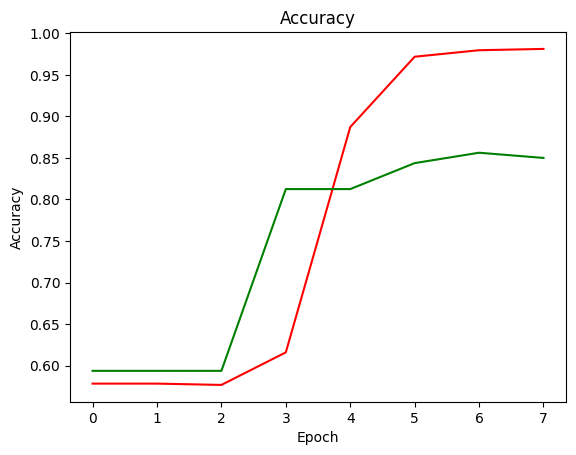

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label="trainning acc",color='red')
plt.plot(history.history['val_accuracy'],label="Validation acc",color='green',)
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")


<h3> Option 3 : Train a NN for prediction with using pre-trained text embedding model trained by google [KerasHub] </h3>

In [43]:
yt_train

,TEXT,CLASS
610,i love you katy perry because you will sing ni...,0
776,"""....because I AM a champion...and you're gonn...",0
584,I like you . Katy Perry 600▲60▲6▲﻿,0
597,"When I hear Katy singing this, I cry. The song...",0
66,Please go in and see our Channel and subscribe...,1
...,...,...
549,Like my page please... https://m.facebook.com...,1
179,visit &quot; ww estiloproduction com &quot; be...,1
751,"The funny thing is, 1,700,000,000 of the views...",0
28,Hey Music Fans I really appreciate all of you ...,1


In [44]:
yt_val

,TEXT,CLASS
53,subscribe to my pagee please.,1
672,This has had over 2 billion views. Holy shit.﻿,0
249,thumbs up if u checked this video to see hw vi...,0
733,The most watched video on YouTube is Psy’s “Ga...,0
649,https://soundcloud.com/j-supt-fils-du-son/fuck...,1
...,...,...
524,Check out this video on YouTube:﻿,1
355,"And after the video ends, a 13 ft. boa constri...",0
114,/watch?v=Dtqcftr1Fac JUSTIEN BIEBER CAR 2013. ...,1
784,Please friend read my book and repass: http://...,1


In [45]:
yt_test

,TEXT,CLASS
0,"Is this the video that started the whole ""got ...",0
1,Can anyone sub to my channel? :Dï»¿,1
2,prehistoric song..has beenï»¿,0
3,You think you're smart? Headbutt your f...,0
4,DISLIKE.. Now one knows REAL music - ex. Enime...,0
...,...,...
197,Check out this video on YouTube:ï»¿,1
198,Check out this video on YouTube:ï»¿,1
199,Check out this video on YouTube:ï»¿,1
200,Check out this video on YouTube:ï»¿,1


In [199]:

import tensorflow_hub as hub
# # Use Keras 2.
# version_fn = getattr(tf.keras, "version", None)
# if version_fn and version_fn().startswith("3."):
#   import tf_keras as keras

In [200]:
yt_train_X.shape

(798,)

In [231]:

embedding= "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer=hub.KerasLayer(embedding,input_shape=[],dtype=tf.string,trainable=True)

model = tf.keras.Sequential()
model.add(hub_layer)

model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [232]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [233]:
history=model.fit(yt_train_tfdata,epochs=8,validation_data=yt_valid_tfdata)

Epoch 1/8
22/22 [==============================] - 11s 487ms/step - loss: 0.6648 - accuracy: 0.5799 - val_loss: 0.6136 - val_accuracy: 0.5938
Epoch 2/8
22/22 [==============================] - 11s 521ms/step - loss: 0.6107 - accuracy: 0.5940 - val_loss: 0.5583 - val_accuracy: 0.6187
Epoch 3/8
22/22 [==============================] - 13s 583ms/step - loss: 0.5408 - accuracy: 0.6661 - val_loss: 0.4893 - val_accuracy: 0.7250
Epoch 4/8
22/22 [==============================] - 12s 567ms/step - loss: 0.4389 - accuracy: 0.7774 - val_loss: 0.4129 - val_accuracy: 0.8562
Epoch 5/8
22/22 [==============================] - 13s 580ms/step - loss: 0.3212 - accuracy: 0.9091 - val_loss: 0.3437 - val_accuracy: 0.8875
Epoch 6/8
22/22 [==============================] - 13s 592ms/step - loss: 0.2232 - accuracy: 0.9357 - val_loss: 0.3115 - val_accuracy: 0.8875
Epoch 7/8
22/22 [==============================] - 12s 561ms/step - loss: 0.1348 - accuracy: 0.9702 - val_loss: 0.3089 - val_accuracy: 0.8875
Epoch 

Text(0.5, 0, 'epoch')

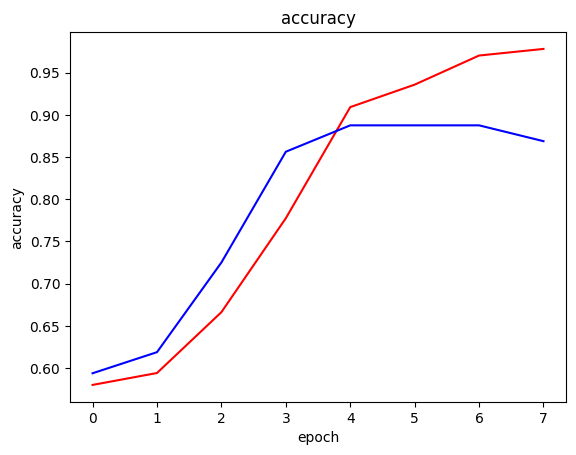

In [234]:
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='blue')
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')


In [235]:
model.evaluate(yt_test_tfdata)

7/7 [==============================] - 1s 104ms/step - loss: 0.3344 - accuracy: 0.8564


[0.3344336450099945, 0.8564356565475464]